# Riskfolio-Lib Tutorial:
<br><a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
</a>

<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a>
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 24: Hierarchical Risk Parity (HRP) Portfolio Optimization

## 1. Downloading the data:

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2019-12-30'

# Tickers of assets
assets = [
    # Technology
    'AAPL', 'MSFT', 'NVDA',
    # Consumer Staples
    'KO', 'PG', 'CPB',
    # Financials
    'JPM', 'BAC', 'ZION',
    # Healthcare
    'JNJ', 'UNH', 'TMO',
    # Energy
    'XOM', 'CVX', 'APA',
    # Utilities
    'DUK', 'NEE', 'CNP',
    # Communication Services
    'VZ', 'CMCSA'
]

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Failed to get ticker 'JPM' reason: Failed to perform, curl: (28) Connection timed out after 10047 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  20 of 20 completed


In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AAPL,APA,BAC,CMCSA,CNP,CPB,CVX,DUK,JNJ,JPM,KO,MSFT,NEE,NVDA,PG,TMO,UNH,VZ,XOM,ZION
Date,,,,,,,,,,,,,,,,,,,,
2000-01-04,-8.4310%,-4.3956%,-5.9355%,-7.4866%,1.1236%,-3.6913%,0.0000%,1.5544%,-3.6610%,-2.1941%,0.1109%,-3.3780%,1.8182%,-2.6701%,-1.9241%,-3.7500%,-1.2790%,-3.2325%,-1.9153%,-4.8424%
2000-01-05,1.4633%,2.8736%,1.0974%,-2.6011%,4.1666%,-0.2454%,1.7937%,4.0817%,1.0556%,-0.6173%,0.8859%,1.0544%,3.2738%,-3.2921%,-1.9025%,0.8658%,-0.2356%,3.3405%,5.4516%,-0.1184%
2000-01-06,-8.6539%,9.4972%,8.5481%,3.8575%,0.5334%,2.1090%,4.2584%,2.6961%,3.1337%,1.4197%,0.1098%,-3.3498%,0.0000%,-6.5253%,4.6060%,0.0000%,3.6600%,-0.5079%,5.1697%,1.4218%
2000-01-07,4.7369%,-0.3401%,-2.6249%,-3.1428%,1.5915%,1.8933%,1.7606%,2.6253%,4.2539%,1.8372%,6.5789%,1.3068%,2.8818%,1.6700%,7.9954%,1.2876%,11.7312%,-0.7384%,-0.2935%,0.2336%
2000-01-10,-1.7588%,-3.9249%,-3.4661%,12.8319%,-1.3055%,-3.2095%,-2.6990%,-0.1163%,-2.5259%,-1.7182%,-3.1893%,0.7291%,-0.8403%,3.2829%,-0.4828%,-0.8475%,-1.7329%,-0.5313%,-1.3981%,-1.8065%


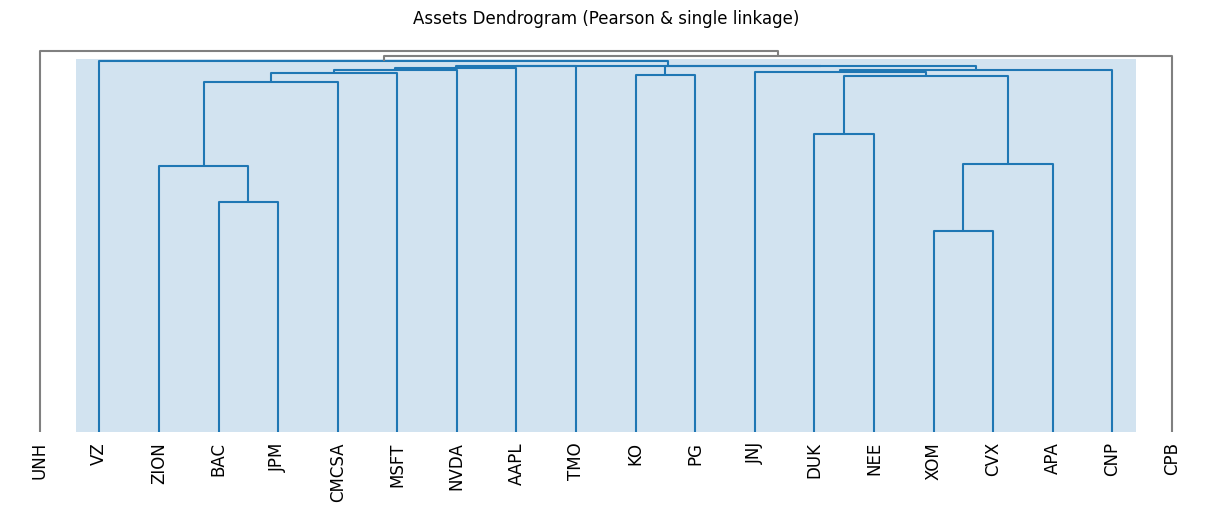

In [4]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

The dendrogram above suggest that optimal number of clusters are four. However HRP portfolios don't use a number of clusters as input.

## 2. Estimating HRP Portfolio

This is the original model proposed by López de Prado (2016). Riskfolio-Lib expand this model to 32 risk measures.

### 2.1 Calculating the HRP portfolio

In [5]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,AAPL,APA,BAC,CMCSA,CNP,CPB,CVX,DUK,JNJ,JPM,KO,MSFT,NEE,NVDA,PG,TMO,UNH,VZ,XOM,ZION
weights,2.1799%,3.3364%,0.9485%,3.8911%,3.3255%,7.9067%,5.0790%,4.6421%,11.7716%,1.3279%,10.1169%,4.5863%,5.4643%,1.2517%,9.7238%,4.3137%,4.8521%,7.9067%,5.6198%,1.7560%


### 2.2 Plotting portfolio composition

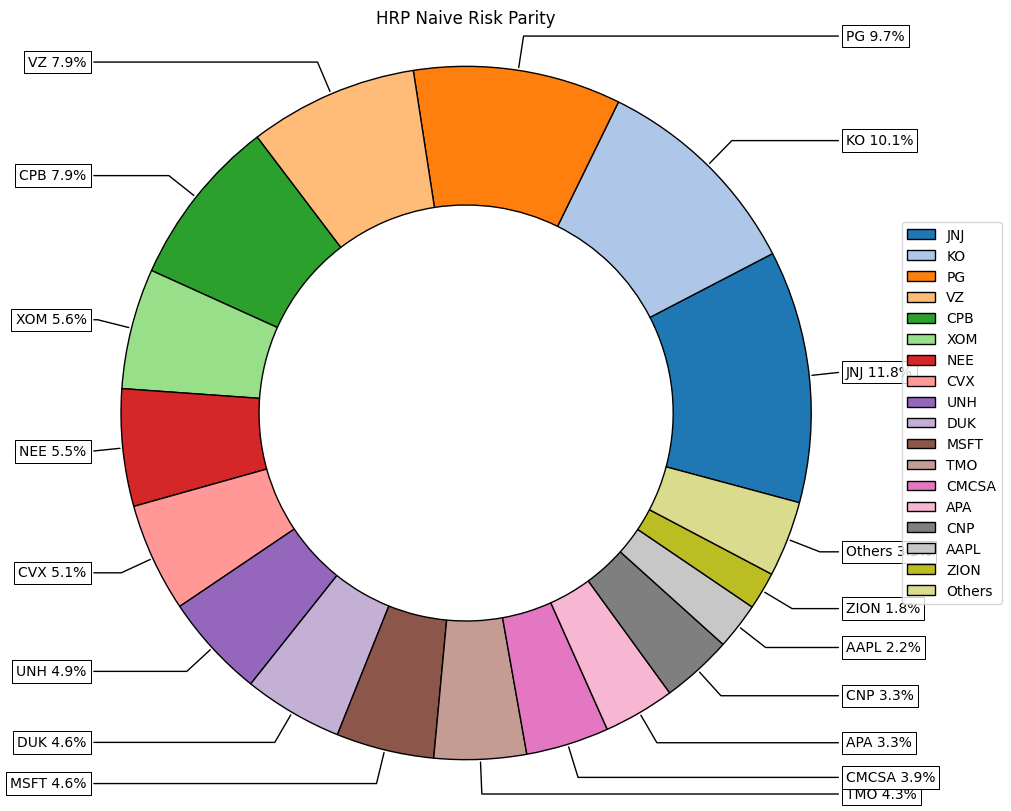

In [9]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

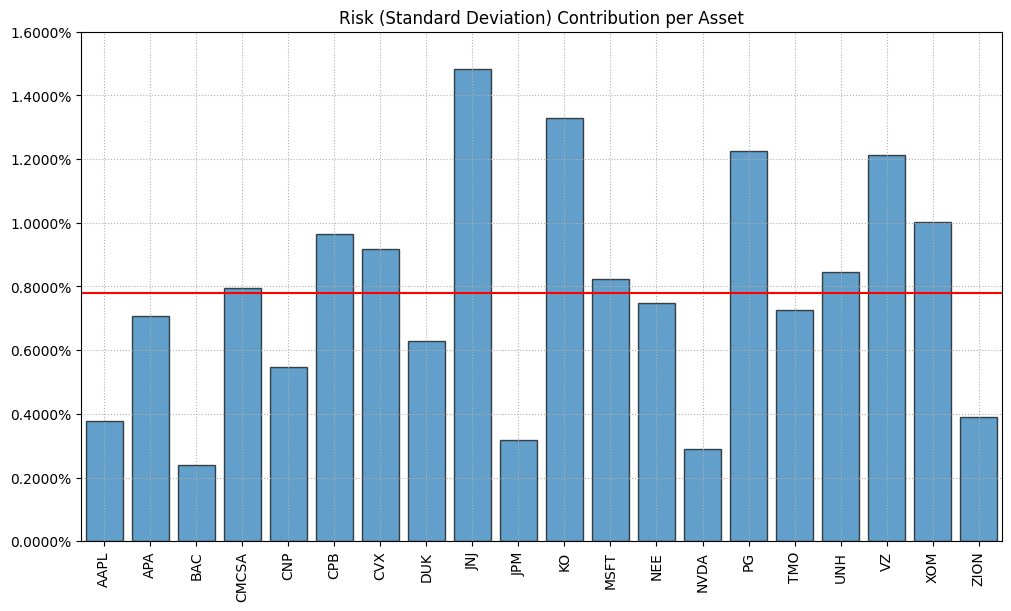

In [10]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### 2.4 Calculate Optimal HRP Portfolios for Several Risk Measures

In [12]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'GMD': Gini Mean Difference.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'TG': Tail Gini.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax).
# 'RG': Range of returns.
# 'CVRG': CVaR Range of returns.
# 'TGRG': Tail Gini Range of returns.
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'GMD', 'MSV', 'FLPM', 'SLPM', 'VaR',
       'CVaR', 'TG', 'WR', 'RG', 'CVRG', 'TGRG', 'MDD',
       'ADD', 'DaR', 'CDaR', 'UCI', 'MDD_Rel',
       'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms

In [13]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,GMD,MSV,FLPM,SLPM,VaR,CVaR,TG,WR,RG,CVRG,TGRG,MDD,ADD,DaR,CDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,UCI_Rel
AAPL,2.77%,2.18%,2.64%,2.65%,2.60%,2.76%,2.65%,2.49%,2.77%,2.85%,1.59%,2.37%,2.76%,2.90%,2.26%,2.71%,1.69%,1.75%,2.12%,2.45%,3.59%,1.81%,1.96%,2.81%
APA,4.86%,3.34%,4.55%,4.64%,4.87%,4.45%,4.82%,4.68%,5.05%,5.16%,4.52%,5.10%,4.96%,5.09%,5.38%,2.75%,3.31%,3.97%,3.20%,5.49%,2.91%,4.14%,4.74%,3.46%
BAC,1.76%,0.95%,2.10%,2.00%,1.83%,2.07%,1.81%,2.09%,1.81%,1.70%,1.21%,1.73%,1.73%,1.61%,1.07%,2.46%,2.37%,1.76%,2.09%,1.43%,1.62%,1.69%,1.55%,1.59%
CMCSA,5.19%,3.89%,5.09%,5.07%,5.20%,5.04%,5.18%,4.74%,5.09%,5.25%,6.62%,6.22%,5.03%,5.13%,5.16%,5.05%,4.73%,4.54%,4.92%,5.31%,3.98%,4.17%,4.50%,4.14%
CNP,3.41%,3.33%,3.86%,3.84%,3.42%,3.85%,3.41%,4.09%,3.58%,3.39%,1.96%,1.73%,3.68%,3.52%,2.49%,3.28%,2.79%,2.88%,3.10%,2.87%,2.81%,2.98%,3.05%,2.93%
CPB,5.25%,7.91%,4.96%,4.99%,5.24%,4.88%,5.21%,5.07%,5.01%,5.05%,6.69%,6.82%,5.07%,5.11%,7.63%,4.40%,5.23%,6.03%,5.05%,5.21%,5.30%,5.88%,5.78%,5.82%
CVX,5.90%,5.08%,5.76%,5.84%,5.86%,5.68%,5.83%,5.80%,5.96%,5.99%,5.20%,4.37%,6.04%,6.07%,7.26%,5.64%,6.17%,6.93%,6.40%,7.85%,5.44%,6.44%,7.12%,6.18%
DUK,3.97%,4.64%,3.95%,3.99%,3.97%,3.99%,3.99%,3.97%,3.87%,3.84%,5.27%,3.93%,4.06%,4.01%,3.08%,3.39%,2.75%,2.80%,3.21%,3.33%,3.51%,3.21%,3.16%,3.42%
JNJ,8.94%,11.77%,8.99%,9.02%,8.91%,9.10%,8.95%,9.05%,8.83%,8.74%,6.88%,7.03%,8.99%,8.97%,10.00%,10.83%,12.84%,12.54%,12.11%,9.65%,11.29%,13.11%,12.37%,12.19%
JPM,2.08%,1.33%,2.26%,2.19%,2.18%,2.24%,2.17%,2.08%,2.14%,2.12%,1.69%,2.42%,2.00%,1.94%,1.92%,3.03%,3.54%,2.75%,2.99%,1.81%,3.31%,2.81%,2.24%,3.15%


<Axes: >

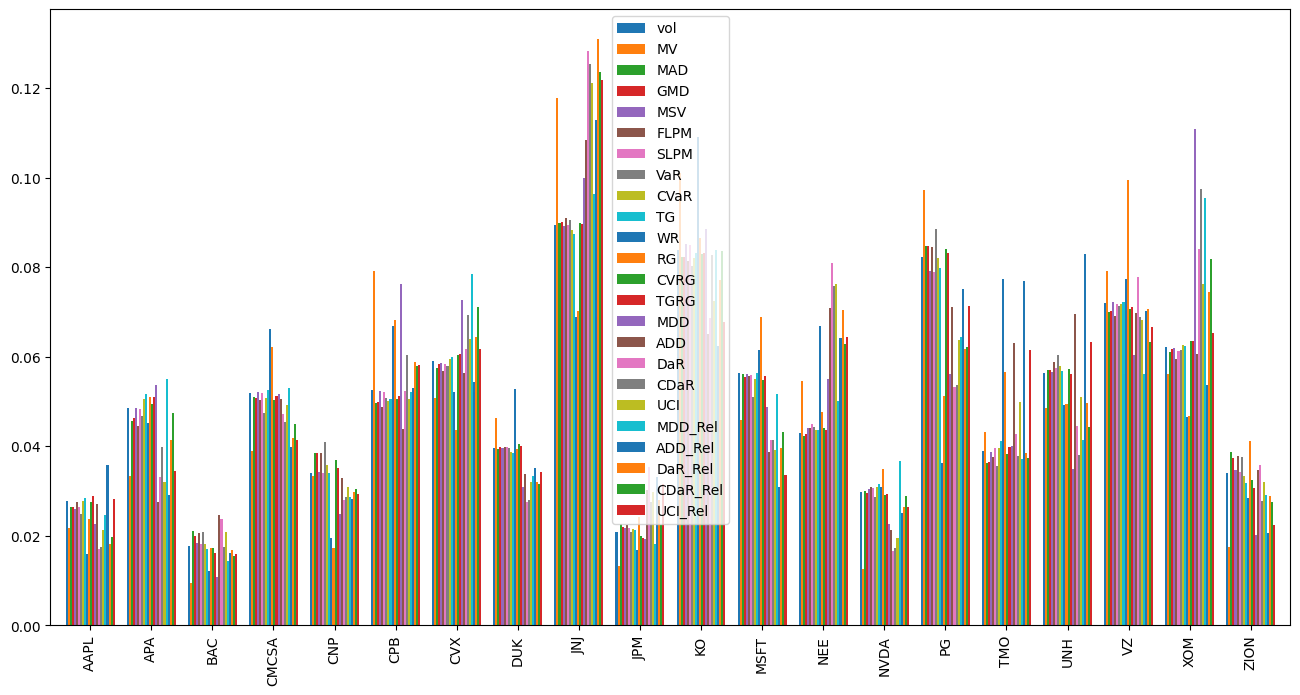

In [14]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot(kind='bar', width=0.8, ax=ax)

# Task
Backtest the HRP portfolio against an equally weighted portfolio using matplotlib.

## Calculate equally weighted portfolio returns

### Subtask:
Calculate the returns for an equally weighted portfolio.


**Reasoning**:
Calculate the number of assets, create an equally weighted portfolio DataFrame, and calculate the returns of the equally weighted portfolio.



In [15]:
num_assets = len(Y.columns)
equal_weight = 1 / num_assets
w_equal = pd.DataFrame([equal_weight] * num_assets, index=Y.columns, columns=['weights'])
returns_equal = Y.dot(w_equal)

**Reasoning**:
Display the first few rows of the `returns_equal` DataFrame to verify the calculation.



In [16]:
display(returns_equal.head())

,weights
Date,
2000-01-04,-2.7090%
2000-01-05,1.1196%
2000-01-06,1.5992%
2000-01-07,2.2622%
2000-01-10,-0.7355%


## Calculate cumulative returns

### Subtask:
Calculate the cumulative returns for both the HRP and equally weighted portfolios.


**Reasoning**:
Calculate the cumulative returns for both the HRP and equally weighted portfolios as per the instructions.



In [17]:
cumulative_returns_hrp = (Y.dot(w) + 1).cumprod()
cumulative_returns_equal = (Y.dot(w_equal) + 1).cumprod()

## Combine cumulative returns

### Subtask:
Combine the cumulative returns into a single DataFrame for easier plotting.


**Reasoning**:
Concatenate the cumulative return dataframes and rename the columns for clarity.



In [18]:
combined_returns = pd.concat([cumulative_returns_hrp, cumulative_returns_equal], axis=1)
combined_returns.columns = ['HRP Portfolio', 'Equally Weighted Portfolio']
display(combined_returns.head())

,HRP Portfolio,Equally Weighted Portfolio
Date,,
2000-01-04,97.6046%,97.2910%
2000-01-05,98.7913%,98.3803%
2000-01-06,100.6876%,99.9535%
2000-01-07,103.6395%,102.2147%
2000-01-10,102.6144%,101.4630%


## Visualize cumulative returns

### Subtask:
Plot the cumulative returns of both portfolios using matplotlib.


**Reasoning**:
Plot the cumulative returns of both portfolios using matplotlib as instructed.



**Reasoning**:
The error indicates that `plt.figure(figsize=(12, 6)).subplots()` is returning a single Axes object, not a tuple of a figure and axes. I will fix this by calling `subplots()` directly from `plt` and passing the figure size.



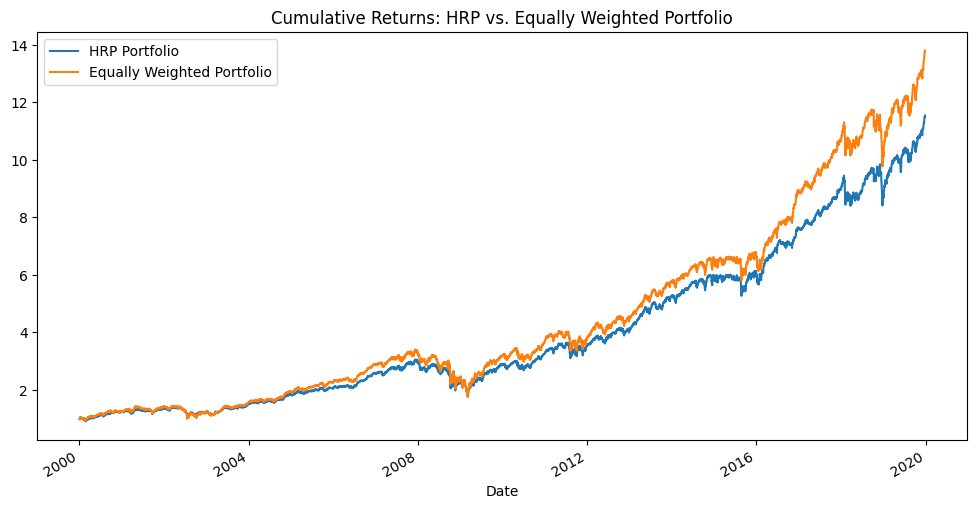

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
combined_returns.plot(ax=ax)
ax.set_title('Cumulative Returns: HRP vs. Equally Weighted Portfolio')
ax.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   An equally weighted portfolio was constructed by assigning a weight of 1 / number of assets to each asset.
*   The cumulative returns for both the HRP and equally weighted portfolios were successfully calculated over the given time period.
*   The cumulative returns of the two portfolios were combined into a single DataFrame for visualization.
*   A plot was generated comparing the cumulative performance of the HRP portfolio against the equally weighted portfolio.

### Insights or Next Steps

*   Analyze the generated plot to compare the performance of the HRP portfolio relative to the equally weighted portfolio over the backtesting period.
*   Consider evaluating other portfolio performance metrics (e.g., Sharpe Ratio, Sortino Ratio, Maximum Drawdown) for both portfolios to get a more comprehensive view of their risk-adjusted returns.


In [21]:
import quantstats as qs
import numpy as np

# Calculate stats for HRP Portfolio
hrp_returns = Y.dot(w).iloc[:, 0]
hrp_sharpe = qs.stats.sharpe(hrp_returns, rf=0)
hrp_sortino = qs.stats.sortino(hrp_returns, rf=0)
hrp_std_dev = qs.stats.volatility(hrp_returns)
hrp_max_drawdown = qs.stats.max_drawdown(hrp_returns)
# Calculate average annual return
hrp_avg_return_daily = qs.stats.avg_return(hrp_returns)
hrp_avg_return_annual = hrp_avg_return_daily * 252


# Calculate stats for Equally Weighted Portfolio
equal_returns = Y.dot(w_equal).iloc[:, 0]
equal_sharpe = qs.stats.sharpe(equal_returns, rf=0)
equal_sortino = qs.stats.sortino(equal_returns, rf=0)
equal_std_dev = qs.stats.volatility(equal_returns)
equal_max_drawdown = qs.stats.max_drawdown(equal_returns)
# Calculate average annual return
equal_avg_return_daily = qs.stats.avg_return(equal_returns)
equal_avg_return_annual = equal_avg_return_daily * 252


# Create a summary DataFrame
summary_data_qs = {
    'HRP Portfolio': [hrp_avg_return_annual, hrp_std_dev, hrp_sharpe, hrp_sortino, hrp_max_drawdown],
    'Equally Weighted Portfolio': [equal_avg_return_annual, equal_std_dev, equal_sharpe, equal_sortino, equal_max_drawdown]
}

summary_df_qs = pd.DataFrame(summary_data_qs, index=['Average Annual Return', 'Annualized Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio', 'Maximum Drawdown'])

display(summary_df_qs)

,HRP Portfolio,Equally Weighted Portfolio
Average Annual Return,13.6004%,14.8582%
Annualized Standard Deviation,16.3733%,18.4353%
Sharpe Ratio,83.0646%,80.5962%
Sortino Ratio,120.3759%,116.2753%
Maximum Drawdown,-41.8773%,-48.6463%
